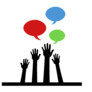

#####The Spark Foundation GRIP Task 1
#Prediction Using Supervised ML 
######By: Opeyemi Adeyemo

In [2]:
## importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [3]:
# Reading the Data 
df = pd.read_csv('http://bit.ly/w-data')
print (df.head(5))
print (df.tail(5))

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
    Hours  Scores
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


We will confirm if the data frame contains null value

In [4]:
# Check if there any null value in the Dataset
print(df.isnull == True)

False


###There is no null value in the Dataset so, we can now visualize our Data.

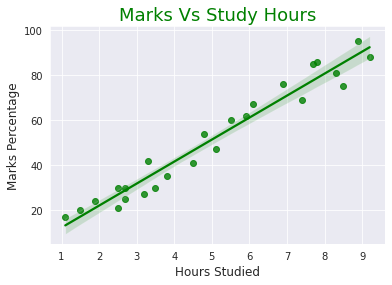

In [5]:
sns.set_style('darkgrid')
#sns.scatterplot(y= df['Scores'], x= df['Hours'])
sns.regplot(y= df['Scores'], x= df['Hours'], color='green')
plt.title('Marks Vs Study Hours',size=18, color='green')
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

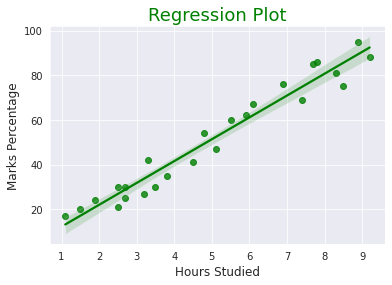

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


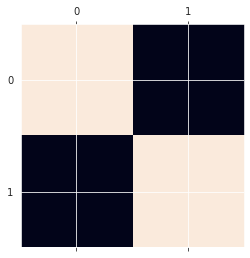

In [6]:
#Regression line confirming the correlation between Marks Percentage and Hours Studied
sns.regplot(x= df['Hours'], y= df['Scores'], color='green')
plt.title('Regression Plot',size=18, color='green')
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(df.corr())
plt.matshow(df.corr())
plt.show()


In [7]:
# Defining X and y from the Data
X=df.iloc[:, :-1].values  
y=df.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [8]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------Model Trained---------")

---------Model Trained---------


##Predicting the Percentage of Marks

In [9]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


###Comparing Actual Marks with Predicted Marks

In [10]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


###Visually Comparing the Predicted Marks with the Actual Marks

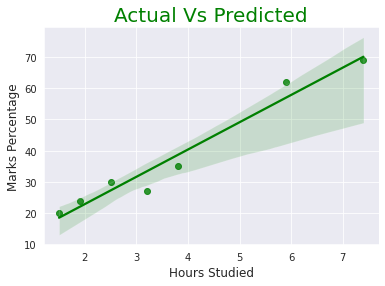

In [11]:
sns.regplot(x=val_X, y=val_y, color='green')
plt.title('Actual Vs Predicted', size=20, color='green')
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

###Evaluating the Model

In [12]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.


##What will be the predicted score of a student if he/she studies for 9.5 hrs/ day?



In [13]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893
